# 7. PV_Stats_Analysis

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

## 1. 데이터 읽기

In [3]:
df = pd.read_csv('./datasets/한국남부발전(주)_신인천소내 태양광발전실적_기상_2021_1H_.csv', encoding='cp949')
df

,일시,기온(°C),일사(MJ/m2),전운량(10분위),강수량(mm),적설(cm),PV
0,2021-01-01 00:00:00,-7.5,0.0,0.0,0.0,0.0,0.0
1,2021-01-01 01:00:00,-7.8,0.0,0.0,0.0,0.0,0.0
2,2021-01-01 02:00:00,-7.8,0.0,2.0,0.0,0.0,0.0
3,2021-01-01 03:00:00,-8.0,0.0,0.0,0.0,0.0,0.0
4,2021-01-01 04:00:00,-7.9,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
8755,2021-12-31 19:00:00,-5.4,0.0,0.0,0.0,0.0,0.0
8756,2021-12-31 20:00:00,-5.8,0.0,0.0,0.0,0.0,0.0
8757,2021-12-31 21:00:00,-6.7,0.0,0.0,0.0,0.0,0.0
8758,2021-12-31 22:00:00,-7.2,0.0,0.0,0.0,0.0,0.0


In [4]:
df.index = pd.to_datetime(df['일시'])
df = df.drop(['일시'], axis=1)
df

,기온(°C),일사(MJ/m2),전운량(10분위),강수량(mm),적설(cm),PV
일시,,,,,,
2021-01-01 00:00:00,-7.5,0.0,0.0,0.0,0.0,0.0
2021-01-01 01:00:00,-7.8,0.0,0.0,0.0,0.0,0.0
2021-01-01 02:00:00,-7.8,0.0,2.0,0.0,0.0,0.0
2021-01-01 03:00:00,-8.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 04:00:00,-7.9,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2021-12-31 19:00:00,-5.4,0.0,0.0,0.0,0.0,0.0
2021-12-31 20:00:00,-5.8,0.0,0.0,0.0,0.0,0.0
2021-12-31 21:00:00,-6.7,0.0,0.0,0.0,0.0,0.0


## 2. PV 발전량과 기상요소와의 상관 분석

### 1) 연중 분석

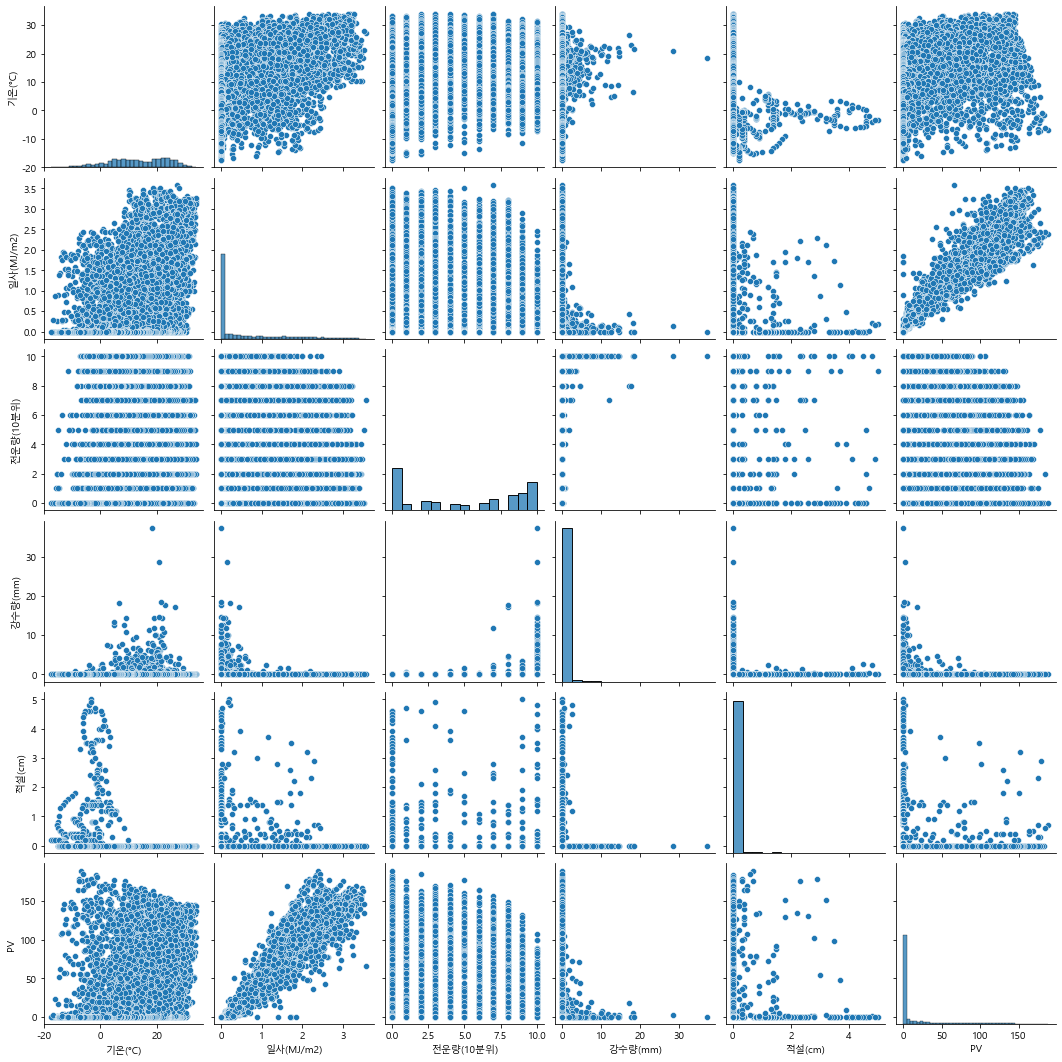

In [5]:
# 산점도
sns.pairplot(df)

In [6]:
# 상관 분석
df.corr()

,기온(°C),일사(MJ/m2),전운량(10분위),강수량(mm),적설(cm),PV
기온(°C),1.000000,0.269742,0.280670,0.034519,-0.198882,0.189410
일사(MJ/m2),0.269742,1.000000,-0.137795,-0.068681,-0.042898,0.960413
전운량(10분위),0.280670,-0.137795,1.000000,0.149880,-0.053825,-0.173938
강수량(mm),0.034519,-0.068681,0.149880,1.000000,0.001108,-0.068010
적설(cm),-0.198882,-0.042898,-0.053825,0.001108,1.000000,-0.029890
PV,0.189410,0.960413,-0.173938,-0.068010,-0.029890,1.000000


<AxesSubplot:>

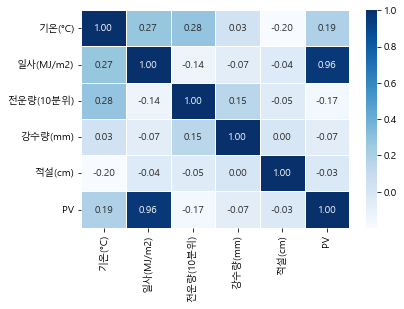

In [7]:
# 상관계수 시각화
sns.heatmap(data=df.corr(), 
                annot=True, fmt='.2f', 
                linewidths=.5, 
                cmap='Blues')

### 2) 월별 분석

In [8]:
# 년월 데이터
pr_m = pd.period_range(start = '2021-01',
                end = None,
                periods = 12,
                freq = 'M')
pr_m

PeriodIndex(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12'],
            dtype='period[M]')

In [9]:
pr_m[0]

Period('2021-01', 'M')

In [10]:
str(pr_m[0])

'2021-01'

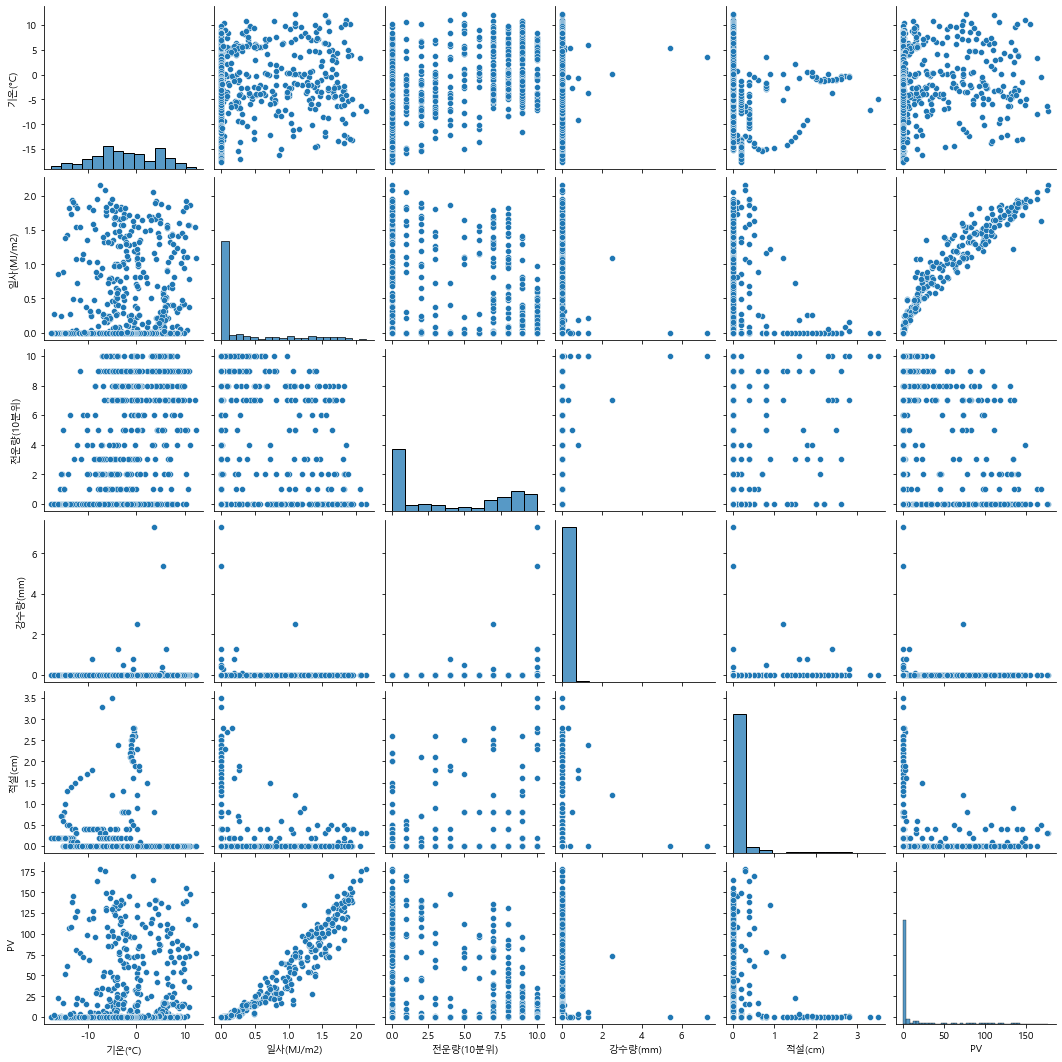

In [11]:
# 산점도
sns.pairplot(df.loc[str(pr_m[0])])

In [12]:
# 상관계수
df.loc[str(pr_m[0])].corr()

,기온(°C),일사(MJ/m2),전운량(10분위),강수량(mm),적설(cm),PV
기온(°C),1.000000,0.103042,0.544000,0.055701,-0.105941,0.099750
일사(MJ/m2),0.103042,1.000000,-0.157803,-0.027861,-0.097373,0.963512
전운량(10분위),0.544000,-0.157803,1.000000,0.099310,0.053295,-0.190787
강수량(mm),0.055701,-0.027861,0.099310,1.000000,0.056550,-0.023328
적설(cm),-0.105941,-0.097373,0.053295,0.056550,1.000000,-0.083791
PV,0.099750,0.963512,-0.190787,-0.023328,-0.083791,1.000000


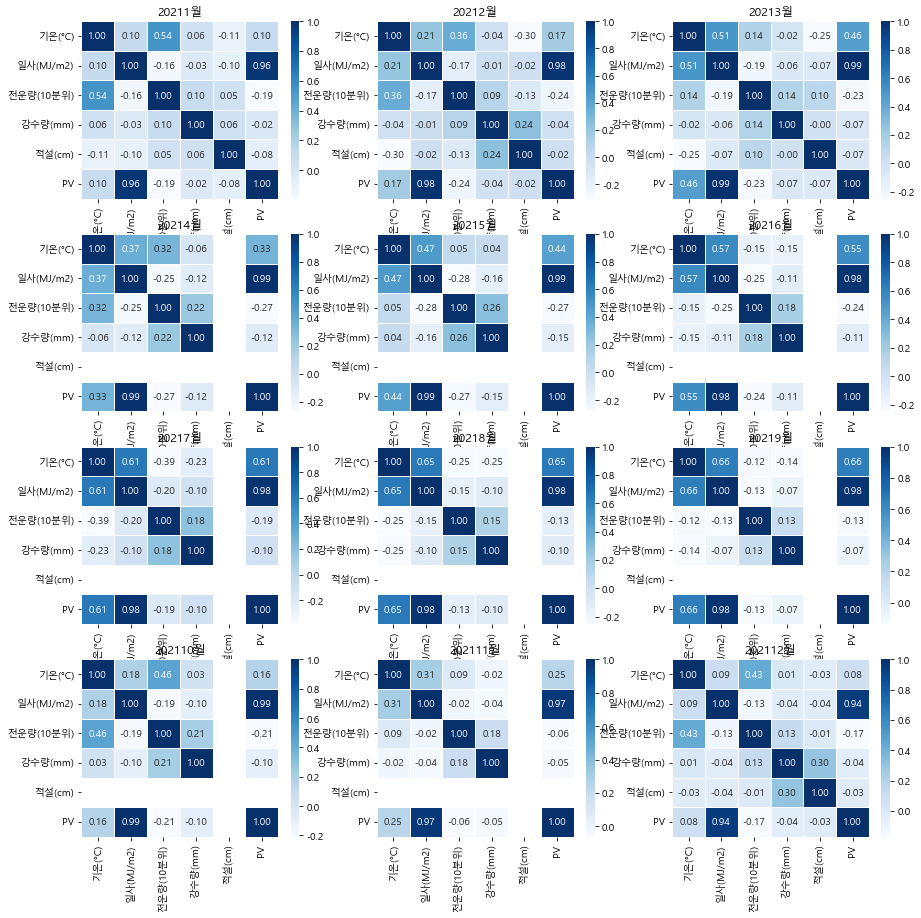

In [13]:
# 월별 시간대별 상관계수 시각화
plt.figure(figsize = (15,15))
for m in range(12):
    plt.subplot(4,3,m+1)
    sns.heatmap(data=df.loc[str(pr_m[m])].corr(), 
                annot=True, fmt='.2f', 
                linewidths=.5, 
                cmap='Blues')
    plt.title('2021'+str(m+1)+'월')

In [14]:
df.loc[str(pr_m[m])].corr()

,기온(°C),일사(MJ/m2),전운량(10분위),강수량(mm),적설(cm),PV
기온(°C),1.000000,0.094605,0.432009,0.005578,-0.034633,0.083397
일사(MJ/m2),0.094605,1.000000,-0.125256,-0.036511,-0.036019,0.944270
전운량(10분위),0.432009,-0.125256,1.000000,0.125287,-0.006690,-0.170232
강수량(mm),0.005578,-0.036511,0.125287,1.000000,0.299821,-0.038313
적설(cm),-0.034633,-0.036019,-0.006690,0.299821,1.000000,-0.027463
PV,0.083397,0.944270,-0.170232,-0.038313,-0.027463,1.000000


In [15]:
df.loc[str(pr_m[m])].corr().values

array([[ 1.        ,  0.0946046 ,  0.43200924,  0.00557773, -0.03463311,
         0.08339717],
       [ 0.0946046 ,  1.        , -0.12525589, -0.0365115 , -0.03601888,
         0.94427019],
       [ 0.43200924, -0.12525589,  1.        ,  0.12528653, -0.00669035,
        -0.17023153],
       [ 0.00557773, -0.0365115 ,  0.12528653,  1.        ,  0.2998207 ,
        -0.03831348],
       [-0.03463311, -0.03601888, -0.00669035,  0.2998207 ,  1.        ,
        -0.02746317],
       [ 0.08339717,  0.94427019, -0.17023153, -0.03831348, -0.02746317,
         1.        ]])

In [16]:
# 연간 시간대별 상관계수 시각화
corr_PV = np.zeros((5,12))
for m in range(12):
    corr_PV[0,m] = df.loc[str(pr_m[m])].corr().values[5,0]
    corr_PV[1,m] = df.loc[str(pr_m[m])].corr().values[5,1]
    corr_PV[2,m] = df.loc[str(pr_m[m])].corr().values[5,2]
    corr_PV[3,m] = df.loc[str(pr_m[m])].corr().values[5,3]
    corr_PV[4,m] = df.loc[str(pr_m[m])].corr().values[5,4]

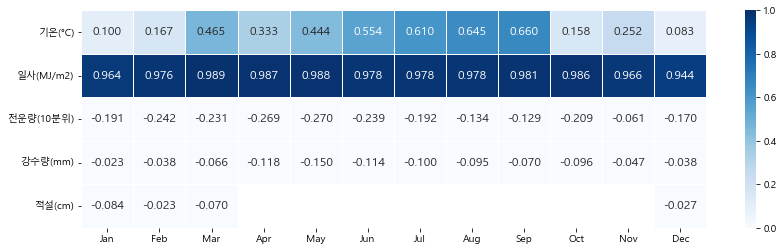

In [17]:
mon_legend=['Jan','Feb','Mar','Apr','May','Jun',
           'Jul','Aug','Sep','Oct','Nov', 'Dec']

plt.figure(figsize=(14,4))
sns.heatmap(data=corr_PV, annot=True, fmt='.3f', linewidths=.5, cmap='Blues', 
            xticklabels=mon_legend, yticklabels=df.columns[:5], annot_kws={"size": 12}, 
            vmin=0, vmax=1)
plt.show()

## 3. 회귀분석

일사량과 상관계수가 가장 높은 3월

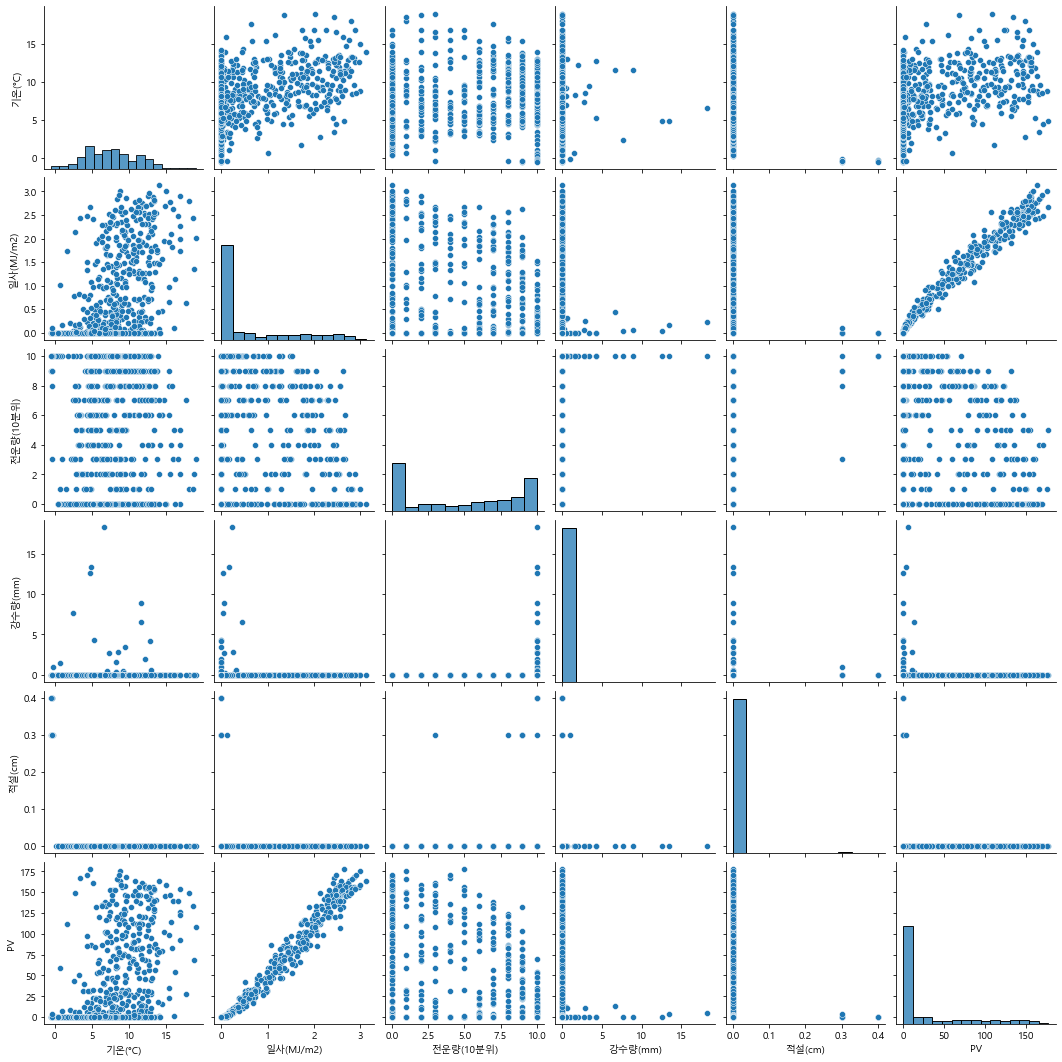

In [19]:
sns.pairplot(df.loc['2021-3'])

<AxesSubplot:xlabel='일사(MJ/m2)', ylabel='PV'>

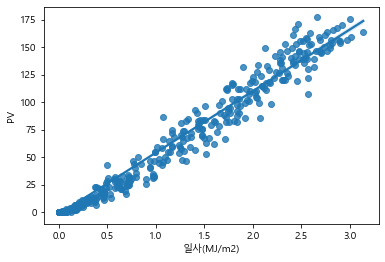

In [20]:
sns.regplot(data=df.loc['2021-3'], x='일사(MJ/m2)', y='PV')

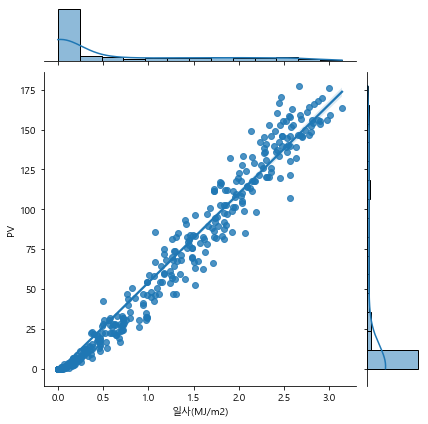

In [21]:
sns.jointplot(data=df.loc['2021-3'], x='일사(MJ/m2)', y='PV', kind='reg')

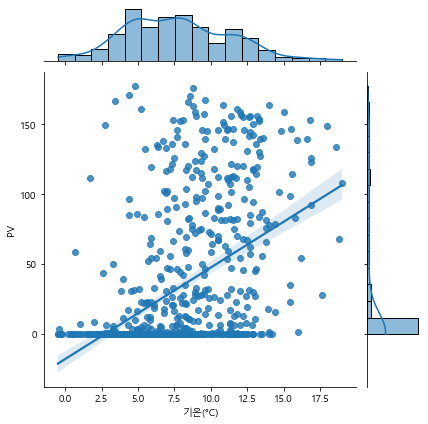

In [31]:
sns.jointplot(data=df.loc['2021-3'], x='기온(°C)', y='PV', kind='reg')

In [37]:
# 계수 구하기: [계수, 절편]
poly1 = np.polyfit(df.loc['2021-3']['일사(MJ/m2)'], df.loc['2021-3']['PV'],1)
f1 = np.poly1d(poly1)
print(poly1)
print(f1)
f1[0], f1[1]

[55.92618007 -1.87561766]
 
55.93 x - 1.876


(-1.8756176637850706, 55.926180071623634)

Text(0.5, 100, 'y=55.9*일사량-1.9')

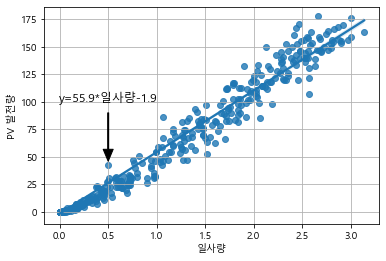

In [38]:
# 시각화
x = np.linspace(0, 3, 100)

plt.figure()
# plt.scatter(df.loc['2020-10']['Irr'], df.loc['2020-10']['PV'])
# plt.plot(x, f1(x), ls='dashed', lw=3, color='g')
sns.regplot(data=df.loc['2021-3'], x='일사(MJ/m2)', y='PV')
plt.xlabel('일사량')
plt.ylabel('PV 발전량')
plt.grid()
plt.annotate('y=' + '{0:0.1f}'.format(f1[1]) + '*일사량' + '{0:0.1f}'.format(f1[0]), 
             xy=(0.5, 40), xytext=(0.5,100),
            fontsize=12, ha='center',
            arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=10))

In [41]:
# 예측 추정
predict = f1(df.loc['2021-3']['일사(MJ/m2)'])
predict

array([ -1.87561766,  -1.87561766,  -1.87561766,  -1.87561766,
        -1.87561766,  -1.87561766,  -1.87561766,  -1.87561766,
        -1.87561766,  -0.19783226,   3.15773854,   5.95404755,
        10.42814195,  10.42814195,   8.19109475,   7.07257115,
         4.83552394,   3.15773854,   0.36142954,  -1.87561766,
        -1.87561766,  -1.87561766,  -1.87561766,  -1.87561766,
        -1.87561766,  -1.87561766,  -1.87561766,  -1.87561766,
        -1.87561766,  -1.87561766,  -1.87561766,  -1.87561766,
         4.27626214,  54.60982421,  94.87667386, 117.24714589,
       134.58426171, 136.26204711, 146.88802133, 133.46573811,
       104.38412447,  57.96539501,  26.64673417,   0.36142954,
        -1.87561766,  -1.87561766,  -1.87561766,  -1.87561766,
        -1.87561766,  -1.87561766,  -1.87561766,  -1.87561766,
        -1.87561766,  -1.87561766,  -1.87561766,  -1.87561766,
         7.63183295,  41.18754099,  72.50620183, 109.41748068,
       125.6360729 , 125.6360729 , 118.36566949,  98.23

In [40]:
# DataFrame으로 변환
df_3m = df.loc['2021-3']
df_3m['Predict'] = predict
df_3m

,기온(°C),일사(MJ/m2),전운량(10분위),강수량(mm),적설(cm),PV,Predict
일시,,,,,,,
2021-03-01 00:00:00,6.5,0.0,10.0,0.0,0.0,0.000,-1.875618
2021-03-01 01:00:00,7.1,0.0,9.0,0.0,0.0,0.000,-1.875618
2021-03-01 02:00:00,7.1,0.0,10.0,0.0,0.0,0.000,-1.875618
2021-03-01 03:00:00,7.0,0.0,10.0,0.0,0.0,0.000,-1.875618
2021-03-01 04:00:00,5.5,0.0,10.0,0.0,0.0,0.000,-1.875618
...,...,...,...,...,...,...,...
2021-03-31 19:00:00,16.0,0.1,5.0,0.0,0.0,1.832,3.717000
2021-03-31 20:00:00,14.2,0.0,4.0,0.0,0.0,0.000,-1.875618
2021-03-31 21:00:00,12.5,0.0,7.0,0.0,0.0,0.000,-1.875618


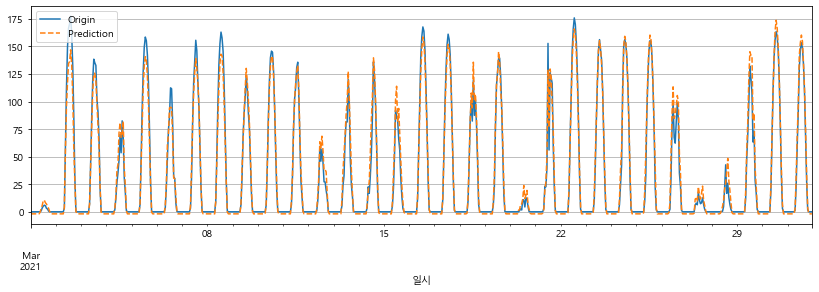

In [42]:
# 예측 결과 시각화
plt.figure(figsize=(14,4))
df_3m['PV'].plot(label='Origin')
df_3m['Predict'].plot(label='Prediction', linestyle='--')
plt.legend()
plt.grid()

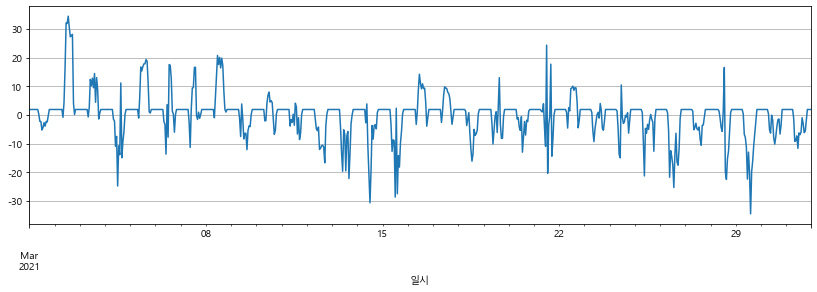

In [43]:
# 예측 오차
plt.figure(figsize=(14,4))
df_3m['Err'] = df_3m['PV'] - df_3m['Predict']
df_3m['Err'].plot()
plt.grid()